<a href="https://colab.research.google.com/github/sarakijanovic/PPPO_IT_14_2018/blob/main/Segmentacija_Sara_Kijanovic_it14_2018.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Predmet:** Principi prezentacije i prepoznavanja oblika

**Student:** Sara Kijanović IT 14-2018


<p align="justify"><b>Segmentacija</b> predstavlja proces podele fotografija na više segmenata, odnosno regiona ili kategorija. Segmentacija fotografije je jedan od najvažnijih procesa kada je u pitanju računarska obrada fotografije. Podrazumeva proces koji deli fotografiju na njene sastavne delove, izdvajajući delove (segmente) koji su od interesa u odnosu na prirodu fotografija. Ti segmenti su definisani kao grupe piksela koji dele zajedničke karakteristike (npr. intenzitet piksela, tekstura itd.). 
Postoje dve osnovne vrste segmentacijr, a to su <b>semantička segmentacija</b> i <b>segmentacija instance</b>.  Semantička segmentacija podrazumeva tehniku izdvajanja regiona i kao takva izdvaja ceo objekat od pozadine pridružujući piksele čija je svetlost ispot nekog praga pozadine. S druge strane, segmentacije instance predstavlja tehniku pronalaženja ivica koja je zasnovana na izdvajanju samo onih piksela koji pripadaju ivicama objekta. </p>



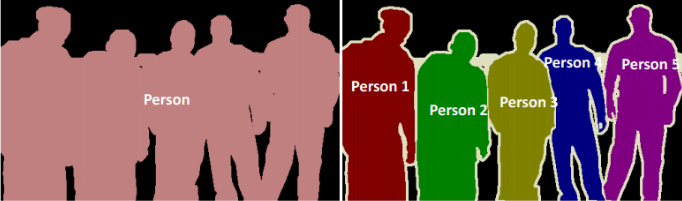


<p align="center">Na slici levo je prikazana semantička segmentacija, dok se desno nalazi primer segmentacije instance.</p>

# **SET PODATAKA**

<p align="justify"> Set podataka koji će biti obrađen u nastavku projekta predstavlja skup fotografija ultrazvuka nerava od ukupno 2.2 GB slika, sa sve realizovanim maskama koje će biti potrebne prilikom kreiranja modela. Zadatak je da se izvrši segmentacija nerava pod nazivom Brahijalni pleksus (BP), na ultrazvučnim slikama. Bitno je istaći da su takvi nervi ručno označeni na fotografijama, odnosno maskama, ali da postoji i deo fotografija gde uopšte nervi nisu prisutni. U slučajevima kada nerv nije prisutan, algoritam ne bi trebalo da predviđa nikakve vrednosti piksela. Ovakva segmentacija bi konkretno mogla biti korisna da smanji bolove pacijentima u različitim situacijama, odnosno da bude značajna medicinskim radnicima za određene aktivnosti. Međutim, dodatna otežavajuća okolnost kod ovog seta podataka je ta što na UZ fotografijama nije lako uočiti nerv s obzirom na različite šumove, eho itd.</p>

<p align="justify"> Set podataka koji će dalje biti korišćen sastoji se iz trening i test fajlova. Train.zip fajl služi za treniranje modela, a u okviru tog fajla imamo dva foldera: <i><b>images i masks</b></i>. Kao što je prethodno u tekstu pomenuto, maske su ručno pravljene od strane stručnih lica gde su označeni nervi na ultrazvučnim fotografijama. Sve fotografije koje u sebi sadrže „mask“, predstavljaju ono što naš algoritam treba da pretpostavi. Suprotno tome, one fotografije koje nemaju „mask“ u svom nazivu, prolaziće kroz algoritam i nad njima se vrši predikcija.</p>

<p align="justify"> Potrebno je dobro istrenirati model kako bi on što tačnije pretpostavio prisutnost/odsutnost nerava na drugim fotografijama. Na osnovu razlike fotografije UZ nerava i njegove odgovarajuće maske, izračunava se greška.</p>

<p align="justify"> Drugi fajl koji se nalazi u setu podataka je <b>Test.zip</b> fajl, i on sadrži samo fotografije bez maski i koristi se za testiranje algoritma. Na kraju se u odnosu na predikcije i ostvarene rezultate računa uspešnost algoritma. </p>

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://drive.google.com/u/0/uc?id=18_wYRTBTsoJ1mmqYLhwkpDLVTzBY-bVq&export=download' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo" -O data_uz.zip && rm -rf /tmp/cookies.txt

--2022-07-15 08:37:51--  https://docs.google.com/uc?export=download&confirm=t&id=1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo
Resolving docs.google.com (docs.google.com)... 142.250.99.102, 142.250.99.138, 142.250.99.101, ...
Connecting to docs.google.com (docs.google.com)|142.250.99.102|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0g-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cha8lms7l7m9e7qvja2ar9pdflrcq62a/1657874250000/12749817884604637057/*/1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo?e=download&uuid=a3a1bdaf-723c-4813-8cf5-85870ff01197 [following]
--2022-07-15 08:37:51--  https://doc-0g-3c-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/cha8lms7l7m9e7qvja2ar9pdflrcq62a/1657874250000/12749817884604637057/*/1zAz7WORXnMuOVZSQN_XJFQOLcdrVw3uo?e=download&uuid=a3a1bdaf-723c-4813-8cf5-85870ff01197
Resolving doc-0g-3c-docs.googleusercontent.com (doc-0g-3c-docs.googleusercontent.com)... 172.253.117.132,

In [ ]:
!unzip data_uz.zip

Streaming output truncated to the last 5000 lines.
  inflating: train/34_114_mask.tif   
  inflating: train/34_115.tif        
  inflating: train/34_115_mask.tif   
  inflating: train/34_116.tif        
  inflating: train/34_116_mask.tif   
  inflating: train/34_117.tif        
  inflating: train/34_117_mask.tif   
  inflating: train/34_118.tif        
  inflating: train/34_118_mask.tif   
  inflating: train/34_119.tif        
  inflating: train/34_119_mask.tif   
  inflating: train/34_11_mask.tif    
  inflating: train/34_12.tif         
  inflating: train/34_12_mask.tif    
  inflating: train/34_13.tif         
  inflating: train/34_13_mask.tif    
  inflating: train/34_14.tif         
  inflating: train/34_14_mask.tif    
  inflating: train/34_15.tif         
  inflating: train/34_15_mask.tif    
  inflating: train/34_16.tif         
  inflating: train/34_16_mask.tif    
  inflating: train/34_17.tif         
  inflating: train/34_17_mask.tif    
  inflating: train/34_18.tif         

<p align="justify"> U prethodnom koraku su učitani podaci, a naredni korak je ubacivanje svih neophodnih biblioteka potrebnih za rad.

**PyTorch** - framework otvorenog koda namenjen radu u mašinskom učenju i kompjuterskoj viziji, razvijen od Meta AI. Bazira se na Python-u i Torch biblioteci. To je jedna od poželjnih platformi za istraživanje dubokog učenja. Okvir je izgrađen da ubrza proces između izrade prototipa istraživanja i primene.

U narednoj liniji koda ubacujemo potrebnu biblioteku:
</p>

In [ ]:
!pip install git+https://github.com/qubvel/segmentation_models.pytorch

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/qubvel/segmentation_models.pytorch to /tmp/pip-req-build-jxi7_5dl
  Running command git clone -q https://github.com/qubvel/segmentation_models.pytorch /tmp/pip-req-build-jxi7_5dl
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 58 kB 3.8 MB/s 
     |████████████████████████████████| 376 kB 16.5 MB/s 
  Created wheel for segmentation-models-pytorch: filename=segmentation_models_pytorch-0.3.0.dev0-py3-none-any.whl size=98008 sha256=39864115681ba353a3540a20f7eee2d7c88388d782dfa5bd65ae590dbf192ce6
  Stored in directory: /tmp/pip-ephem-wheel-cache-k6vwx17t/wheels/fa/c5/a8/1e8af6cb04a0974db8a4a156ebd2fdd1d99ad2558d3fce49d4
  Created wheel for efficientnet-pytorch: filename=efficientnet_pytorch-0.6.3-py3-none-any.whl size=12421 sha256=57fa81d62e5227bc5

Još jedna stvar koju je poželjno dodati je Early stopping tehnika koja služi da prekine proces učenja modela onda kada se rezultati učenja ne poboljšavaju znatno, a i kako se sama neuronska mreža ne bi previše naučila na sam model.

In [ ]:
!git clone https://github.com/Bjarten/early-stopping-pytorch.git esp

Cloning into 'esp'...
remote: Enumerating objects: 92, done.
remote: Total 92 (delta 0), reused 0 (delta 0), pack-reused 92
Unpacking objects: 100% (92/92), done.


<p align="justify"> Kad imamo pripremljene biblioteke, krećemo sa ubacivanjem modula. Za potrebe projekta koristimo nekoliko modula koji prvenstveno služe za vizuelizaciju podataka, manipulaciju nad podacima (poput pandas, numpy itd.). Osim tih modula, ubacujemo i torch module, koji se upravo odnose na prethodno instaliranu biblioteku a služe za izgradnju neuronskih mreža, podršku za GPU, pomoćne funkcije za manipulaciju nad podacima itd.</p>

In [ ]:
import os #podrška operativnom sistemu
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
from esp.pytorchtools import EarlyStopping

In [ ]:
import segmentation_models_pytorch as smp

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
from torch.utils.data import Dataset, DataLoader

import torchvision
from torchvision import transforms

In [ ]:
#iščitavanje training mask podataka jer se time počinje istraživanje samih podataka 

train_mask = pd.read_csv("train_masks.csv")

In [ ]:
train_mask.head(10)
#iščitavamo prvih 10

,subject,img,pixels
0,1,1,168153 9 168570 15 168984 22 169401 26 169818 ...
1,1,2,96346 7 96762 16 97179 27 97595 35 98012 40 98...
2,1,3,121957 2 122365 26 122784 28 123202 31 123618 ...
3,1,4,110980 9 111393 21 111810 33 112228 43 112647 ...
4,1,5,NaN
5,1,6,NaN
6,1,7,172767 15 173175 29 173591 34 173993 7 174004 ...
7,1,8,NaN
8,1,9,NaN
9,1,10,NaN


In [ ]:
train_mask.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5635 entries, 0 to 5634
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   subject  5635 non-null   int64 
 1   img      5635 non-null   int64 
 2   pixels   2323 non-null   object
dtypes: int64(2), object(1)
memory usage: 132.2+ KB


Pomoću metode info() saznajemo osnovne informacije iz ovog fajla a to je da ima tri kolone, i da je treća kolona tipa object, te da ima 2323 non-null vrednosti, što znači da je ostatak upravo null. U narednom koraku proveravamo isto to isna metodom, gde metoda broji koliko ima nedostajućih vrednosti.

In [ ]:
train_mask.isna().sum()

subject       0
img           0
pixels     3312
dtype: int64

Kao što je i u uvodu pomenuto, one fotografije UZ nerava koje nemaju masku znači da ne sadrže nerve. To je jako bitno, stoga u narednom koraku razdvajamo one fotografije koje imaju i koje nemaju, te brojimo kako bismo videli koji je odnos u modelu.

In [ ]:
nerve_exists = (train_mask['pixels'][train_mask['pixels']!= 'NaN'].count())
nerve_doesnt_exist = (train_mask['img'].count() - nerve_exists)

print('nerve exists', nerve_exists )
print('nerve does not exist', nerve_doesnt_exist)

nerve exists 2323
nerve does not exist 3312


Text(0, 0.5, 'Number')

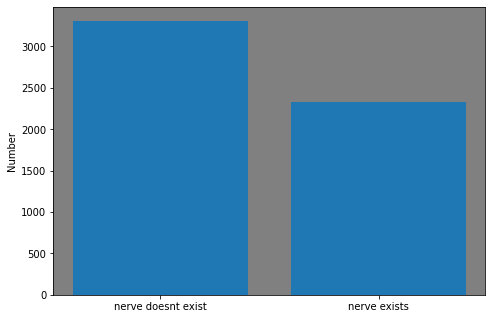

In [ ]:
#vizuelizacija 

plot = plt.figure()
ax = plot.add_axes([0,0,1,1])
x = ['nerve doesnt exist', 'nerve exists']
labels = [nerve_doesnt_exist, nerve_exists]
ax.bar(x, labels)
ax.set_facecolor('grey')
plt.ylabel("Number")


Može se primetiti da je za otprilike četvrtinu više fotografija koje nemaju u sebi nerv, u odnosu na one koje imaju.

Kako bismo kreirali ispravan model, moramo da posmatramo training loss i validation loss. U tom smislu, koristimo prethodno ubačenu biblioteku EarlyStopping, kako bismo pratili validation loss.

pickle modul implementira binarne protokole za serijalizaciju i deserijalizaciju Python objektnih struktura, a radi tako što prvo "serijalizuje" objekat pre nego što ga upiše u datoteku.

In [ ]:
def save_checkpoint(self, val_loss, model):
    import pickle       
    if self.verbose:
        self.trace_func(f'Validation loss decreased ({self.val_loss_min:.6f} --> {val_loss:.6f}).  Saving model ...')
    with open(self.path, 'wb') as f:
        pickle.dump(model, f) 
    self.val_loss_min = val_loss

In [ ]:
EarlyStopping.save_checkpoint = save_checkpoint

Za lakšu manipulaciju nad train i test setom, razdvojićemo putanje jer je potrebno kasnije da ih pozivamo. 

In [ ]:
train_path = 'train'
test_path = 'test'

train_csv_path = 'train_annotation.csv'

In [ ]:
from PIL import Image

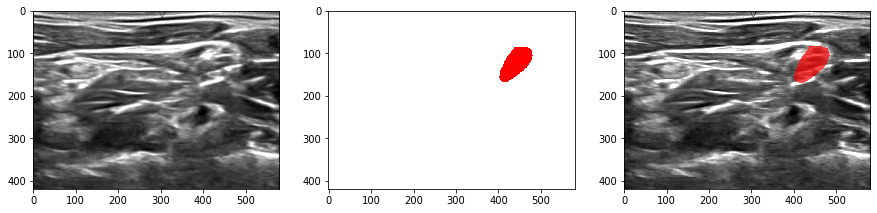

In [ ]:
img1 = np.array(Image.open("train/"+"1_1.tif"))
img1_mask = np.array(Image.open("train/"+"1_1_mask.tif"))
img1_mask = np.ma.masked_where(img1_mask == 0, img1_mask)

fig, ax = plt.subplots(1, 3, figsize = (15, 15))
ax[0].imshow(img1, cmap = "gray")

ax[1].imshow(img1_mask, cmap = "autumn")

ax[2].imshow(img1, cmap = "gray", interpolation = "none")
ax[2].imshow(img1_mask, cmap = "autumn", interpolation = "none", alpha = 0.7)

U primeru iznad smo učitali prvu sliku iz train seta, zatim smo učitali masku koja odgovara datoj fotografiji, a na trećem plotu smo označili upravo gde ta maska pronalazi nerv. Ovo je značajno kod razumevanja kako ostale stvari funkcionišu.

U narednom koraku definišemo funkciju koja će u csv fajl zapisivati matricu sa UZ fotografijama i odgovarajućim maskama.

In [ ]:
def create_csv(data_path, out_csv_path, key_word='mask'):
    to_delete = f'_{key_word}'

    for file_name in os.listdir(data_path):
        if key_word in file_name:
            img = file_name.replace(to_delete, '')
            data = pd.DataFrame([img], index=['img']).transpose()
            data.insert(0, 'mask', file_name)

      #  else:                
            if not os.path.exists(out_csv_path):
                data.to_csv(out_csv_path, header=True, index=False)
            else:
                data.to_csv(out_csv_path, mode='a', header=False, index=False)

In [ ]:
create_csv(data_path=train_path, out_csv_path=train_csv_path)

Sad je potrebno da napravimo i set podataka za sam model koji je naredni korak, a tu smeštamo učitane fotografije UZ-a kao i odgovarajuće maske.

In [ ]:
class ImageDataset(Dataset):
    def __init__(self, df, root_dir, transform=None):
        self.df = df
        self.root_dir = root_dir
        self.transform = transform
    
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, idx):
        if torch.is_tensor(idx):
            idx = idx.tolist()
       
        mask = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 0]))
        image = Image.open(os.path.join(self.root_dir, self.df.iloc[idx, 1]))  
    
        if self.transform:
            return self.transform(image), self.transform(mask)
    
        return image, mask

In [ ]:
train_df = pd.read_csv(train_csv_path)

In [ ]:
train_df.head(10) 
#učitaćemo prvih 10 

,mask,img
0,35_109_mask.tif,35_109.tif
1,29_12_mask.tif,29_12.tif
2,33_97_mask.tif,33_97.tif
3,20_73_mask.tif,20_73.tif
4,19_62_mask.tif,19_62.tif
5,47_37_mask.tif,47_37.tif
6,24_75_mask.tif,24_75.tif
7,36_91_mask.tif,36_91.tif
8,7_117_mask.tif,7_117.tif
9,25_24_mask.tif,25_24.tif


In [ ]:
train_samples = ImageDataset(df=train_df, root_dir=train_path)

U narednom koraku ćemo prikazati nekoliko primera učitanih maski i fotografija UZ-a koji su u prethodnim koracima kreirani

In [ ]:
def draw_samples(data, n_col, n_row):
    fig = plt.figure(figsize=(20, 5))
        
    for i in range(1, n_col + 1):
        img_ax = fig.add_subplot(n_row, n_col, i)
        msk_ax = fig.add_subplot(n_row, n_col, i + n_col)
        
        img_ax.imshow(data[i-1][0], cmap="gray")
        msk_ax.imshow(data[i-1][1], cmap="gray")
        
    fig.show()

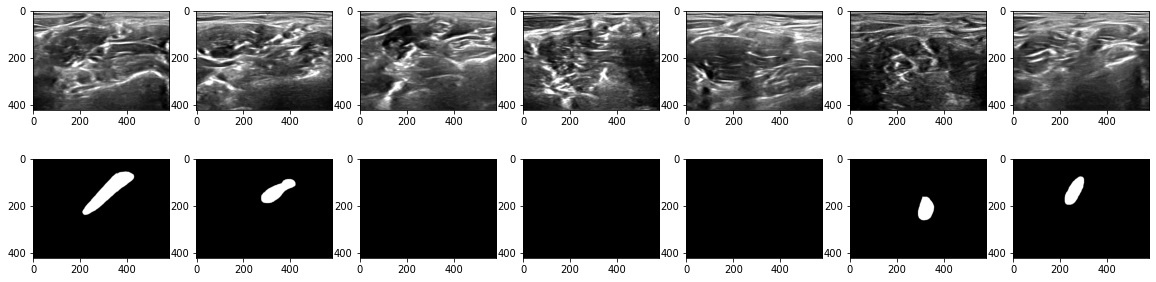

In [ ]:
draw_samples(data=train_samples, n_col = 7, n_row = 2)

U ovom prikazu imamo učitano 7 fotografija sa ciljem da se identifikuju nervi na osnovu maske. Vidimo da je slučaj takav da 4 od 7 sadrže. Dalje idemo da kreiramo model kako bismo istrenirali naš set. 

# **MODEL**

Prethodno je bilo reči o segmentation_model_pytorch, i upravo sad sledi korišćenje SMP-a, odnosno delova biblioteke koji će nam to realizovati. 


In [ ]:
ENCODER = 'vgg11_bn'
ENCODER_WEIGHTS = 'imagenet'
ACTIVATION = 'sigmoid'
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

Najzad definišemo UNet konvolucijsku neuronsku mrežu koja će ovde predstavljati model i nad kojom će se vršiti treniranje. 

In [ ]:
model = smp.Unet(
    encoder_name=ENCODER,
    encoder_weights=ENCODER_WEIGHTS,
    in_channels=1,
    classes=1,
    activation=ACTIVATION
)

Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/hub/checkpoints/vgg11_bn-6002323d.pth


  0%|          | 0.00/507M [00:00<?, ?B/s]

<p align="justify"> <b>IOU (Intersection over Union) metrika</b> - jedna od najznačajnijih metrika koje ćemo posmatrati u ovom primeru. 
IoU predstavlja evaluacionu meriku koja se koristi često u detekciji objekata, sa ciljem da prikaže tačnost detekcije. U ovom primeru IoU bi predstavljala odnos između same maske i predikcije, odnosno preseka (*da li će predvideti nerv na slici kao i što je na masci*). Samim tim, što je IoU bliži 1, znači da je predikcija i te kako dobra, odnosno da je model dobar, a što je bliži 0, znači da je model loš. </p>

In [ ]:
import segmentation_models_pytorch.utils as smpu

In [ ]:
loss = smpu.losses.DiceLoss()
metrics = [smpu.metrics.IoU()]
optimizer = torch.optim.Adam
scheduler = lr_scheduler.StepLR

In [ ]:
def split_df(df, fraction=0.8):  
    df_1 = df.sample(frac=fraction)
    return df_1, df.drop(df_1.index)

In [ ]:
my_transforms = transforms.Compose([
    transforms.Resize(size=(224, 224)),
    transforms.ToTensor()
])

<h2 align="center"><b>TRENIRANJE MODELA</b></h2>

In [ ]:
def train(model, train_df, train_dir, optimizer, loss, metrics, 
          learning_rate=0.01, batch_size=20, epochs=10, patience=3,
          scheduler=None, step_size=5, gamma=0.1, device='cpu', transform=None):   
    
    early_stopping = EarlyStopping(patience, path='best_model.pkl', verbose=True)
    optimizer = optimizer(model.parameters(), learning_rate)

    if scheduler:
        scheduler = scheduler(optimizer, step_size, gamma) 

    train_epoch = smp.utils.train.TrainEpoch(
        model, loss, metrics, optimizer, device, verbose=True
    )
    
    valid_epoch = smp.utils.train.ValidEpoch(
        model, loss, metrics, device, verbose=True
    ) 
    
    train_logs, valid_logs = [], []
    
    for epoch in range(epochs):   
        train_dataframe, val_dataframe = split_df(train_df) 
          
        train_dataset = ImageDataset(train_dataframe, train_dir, transform=transform)

        valid_dataset = ImageDataset(val_dataframe, train_dir, transform=transform)

        train_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                                   batch_size=batch_size, 
                                                   shuffle=True)    

        valid_loader = torch.utils.data.DataLoader(dataset=train_dataset, 
                                                   batch_size=batch_size, 
                                                   shuffle=False)        

        print(f'\nEpoch: {epoch+1}/{epochs}')

        train_log = train_epoch.run(train_loader)
        valid_log = valid_epoch.run(valid_loader)
        
        train_logs.append(train_log)
        valid_logs.append(valid_log)
   
        early_stopping(valid_log[loss.__name__], model)
        
        if early_stopping.early_stop:
            print("Early stopping")
            break

        if scheduler:
            scheduler.step()

    return train_logs, valid_logs

<p align="justify"> U primeru imamo 20 epoha gde se posmatraju i upoređuju različiti parametri. Računa se training loss, validation loss i IoU </p>

In [ ]:
res = train(model=model,
            train_df=train_df, 
            train_dir=train_path, 
            optimizer=optimizer,
            loss=loss,
            learning_rate=0.01,
            metrics=metrics,
            batch_size=20,
            epochs=20,
            scheduler=scheduler,
            step_size=10,
            patience=3,
            device=DEVICE, 
            transform=my_transforms)


Epoch: 1/20
valid: 100%|██████████| 226/226 [01:01<00:00,  3.67it/s, dice_loss - 0.5213, iou_score - 0.3184]
Validation loss decreased (inf --> 0.521317).  Saving model ...

Epoch: 2/20
valid: 100%|██████████| 226/226 [01:01<00:00,  3.70it/s, dice_loss - 0.4195, iou_score - 0.4142]
Validation loss decreased (0.521317 --> 0.419502).  Saving model ...

Epoch: 3/20
valid: 100%|██████████| 226/226 [01:00<00:00,  3.73it/s, dice_loss - 0.438, iou_score - 0.3959]
EarlyStopping counter: 1 out of 3

Epoch: 4/20
valid: 100%|██████████| 226/226 [01:00<00:00,  3.71it/s, dice_loss - 0.4405, iou_score - 0.3958]
EarlyStopping counter: 2 out of 3

Epoch: 5/20
valid: 100%|██████████| 226/226 [01:00<00:00,  3.72it/s, dice_loss - 0.3825, iou_score - 0.452]
Validation loss decreased (0.419502 --> 0.382490).  Saving model ...

Epoch: 6/20
valid: 100%|██████████| 226/226 [01:00<00:00,  3.73it/s, dice_loss - 0.3818, iou_score - 0.4535]
Validation loss decreased (0.382490 --> 0.381831).  Saving model ...

Ep

<h2 align="center"><B>PREZENTACIJA DOBIJENIH REZULTATA TRENIRANJA I SEGMENTACIJE<B></h2>




In [ ]:
import pickle

In [ ]:
with open('results.pkl', 'wb') as f:
    pickle.dump(res, f)

In [ ]:
with open('best_model.pkl', 'rb') as f:
    best_model = pickle.load(f)

In [ ]:
train_logs_df = pd.DataFrame(res[0])
valid_logs_df = pd.DataFrame(res[1])

res_dict = {'train': train_logs_df, 'valid': valid_logs_df}

In [ ]:
def draw_graphic(df_dict, title, criteria, xlab, ylab, colors=['y', 'c'], 
                 legend_loc='best', figsize=(12, 8), fontsize=14):
    fig = plt.figure(figsize=figsize)
    for i, key in enumerate(df_dict):
        plt.plot(df_dict[key].index.tolist(), df_dict[key][criteria].tolist(), colors[i], lw=3, label=key)
    plt.xlabel(xlab, fontsize=fontsize)
    plt.ylabel(ylab, fontsize=fontsize)
    plt.title(title, fontsize=fontsize)
    plt.legend(loc=legend_loc, fontsize=fontsize)
    plt.grid()
    
    fig.show() 

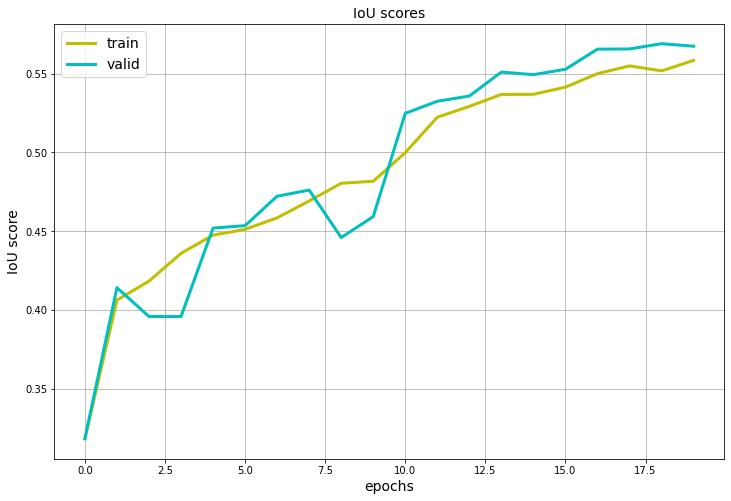

In [ ]:
draw_graphic(df_dict=res_dict, title='IoU scores', criteria='iou_score', xlab='epochs', ylab='IoU score')

Na primeru možemo videti da training i validation loss u velikoj meri kroz epohe su približnih vrednosti. 

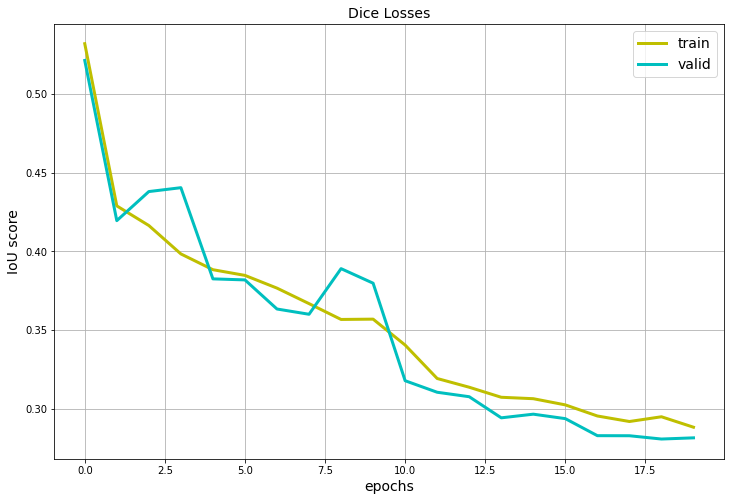

In [ ]:
draw_graphic(df_dict=res_dict, title='Dice Losses', criteria='dice_loss', xlab='epochs', ylab='IoU score')

<h2 align="center"><b> Rad nad testnim podacima </b></h2>

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
def rle_encoding(x):
    dots = np.where(x.T.flatten()==1)[0]
    run_lengths = []
    prev = -2
    for b in dots:
        if (b>prev+1): run_lengths.extend((b+1, 0))
        run_lengths[-1] += 1
        prev = b
    return run_lengths

In [ ]:
imgs = [f for f in os.listdir(test_path)]
imgs = sorted(imgs, key=lambda s: int(s.split('.')[0]))

Kreiramo novi *csv* fajl u okviru kog će se nalaziti podaci o tome da li se na fotografiji nalazi nerv ili ne, a sve to u odnosu na prethodno istreniran model. 

In [ ]:
def create_csv_submission(model, data_path, img_list, out_path):
    submission_df = pd.DataFrame(columns=['img', 'pixels'])
    model.to(DEVICE)
    model.eval()
    
    for i, img in enumerate(tqdm(img_list)):
        x = Image.open(os.path.join(data_path, img))

        x = my_transforms(x)

        x = x.unsqueeze(0).to(DEVICE)
        pred_mask = model.predict(x)

        pred_mask = pred_mask.cpu()
        pred_mask = transforms.Resize(size=(420, 580))(pred_mask)

        encoding = rle_encoding(pred_mask)

        pixels = ' '.join(map(str, encoding))
        submission_df.loc[i] = [str(i+1), pixels]

    submission_df.to_csv(out_path, index=False)

In [ ]:
create_csv_submission(model=model, 
                      data_path=test_path, 
                      img_list=imgs,
                      out_path='submission.csv')

  0%|          | 0/5508 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matricesor `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at  ../aten/src/ATen/native/TensorShape.cpp:2981.)
  


In [ ]:
test_res = pd.read_csv("submission.csv")

In [ ]:
test_res.head(20)

,img,pixels
0,1,NaN
1,2,NaN
2,3,NaN
3,4,NaN
4,5,103884 15 104304 15 104723 1 104725 2 104728 1...
5,6,NaN
6,7,NaN
7,8,NaN
8,9,100976 23 101396 24 101809 55 102229 55 102647...
9,10,NaN
